In [58]:
import itertools
import warnings
from datetime import datetime

import geopandas
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
geopandas.options.io_engine = "pyogrio"
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from plotting import plot_correlation, plot_parameter
import intervals

parameters = [
    "turbidity",
    "conductivity",
    "ecoli"
]

watershed_parameters = intervals.joined_parameters_query(parameters, intervals.locations_query())
watershed_parameters = watershed_parameters[(watershed_parameters.start_date.dt.year >= 2000) & (watershed_parameters.avg_value_ecoli <= 50000)].dropna()

watershed_parameters.describe()

,avg_value_turbidity,median_value_turbidity,max_value_turbidity,min_value_turbidity,start_date,avg_value_conductivity,median_value_conductivity,max_value_conductivity,min_value_conductivity,avg_value_ecoli,median_value_ecoli,max_value_ecoli,min_value_ecoli
count,34.000000,34.000000,34.000000,34.000000,34,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,11.076250,10.752059,13.620882,9.435882,2011-10-01 04:14:07.058823424,879.096765,883.908824,927.744118,847.038235,3113.355882,3051.105882,4387.655882,2049.908824
min,0.910000,0.910000,0.910000,0.910000,2000-01-11 00:00:00,495.000000,495.000000,495.000000,495.000000,435.200000,435.200000,435.200000,80.000000
25%,2.225000,2.225000,2.390000,1.812500,2006-11-05 00:00:00,783.604167,797.762500,839.750000,747.200000,1843.750000,1818.587500,2419.525000,1044.975000
50%,3.877500,3.877500,4.060000,3.015000,2011-05-13 00:00:00,858.300000,858.300000,910.000000,855.250000,2419.600000,2419.400000,2419.600000,1923.150000
75%,6.266875,6.300000,8.875000,4.370000,2017-01-11 00:00:00,960.000000,960.000000,966.750000,926.625000,2419.600000,2419.600000,3137.500000,2419.600000
max,200.000000,200.000000,200.000000,200.000000,2023-05-10 00:00:00,1431.000000,1431.000000,1492.000000,1431.000000,21000.000000,21000.000000,30000.000000,12000.000000
std,33.725621,33.724172,34.903796,33.790795,NaN,164.599698,163.706086,189.318299,166.963108,3724.577753,3747.109988,6023.352188,2001.607886


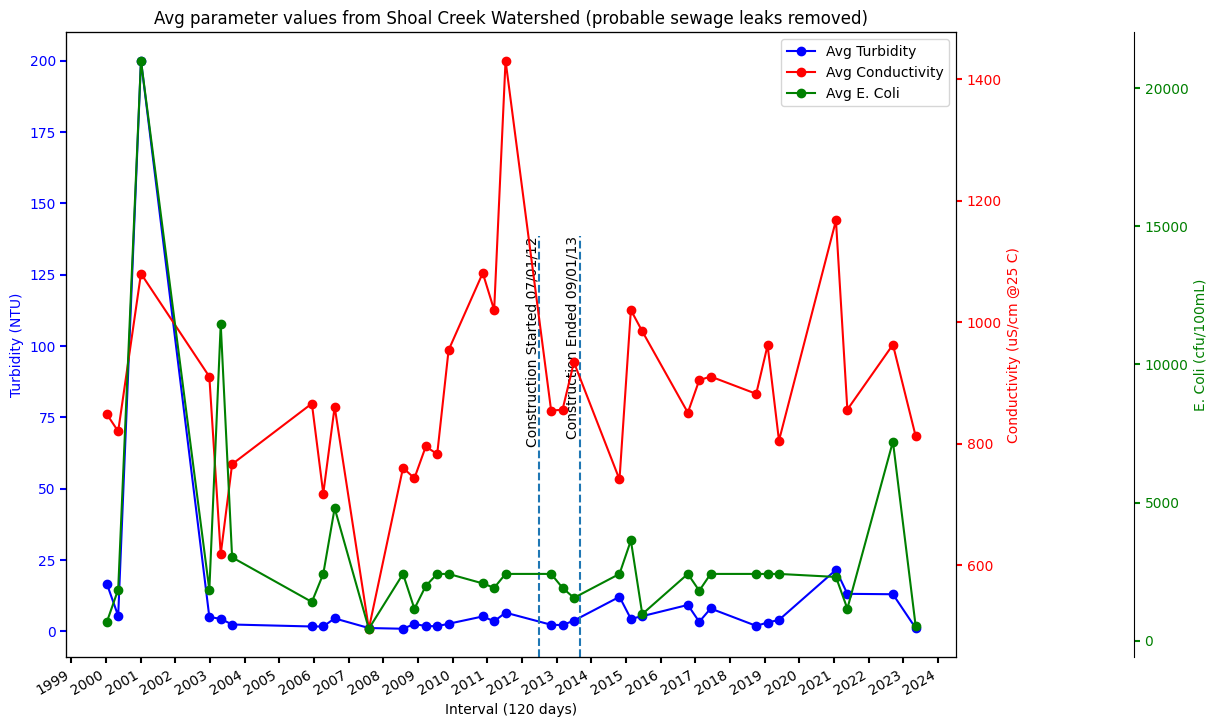

In [60]:
plot_parameter(watershed_parameters, 'avg', f'Avg parameter values from Shoal Creek Watershed (probable sewage leaks removed)')

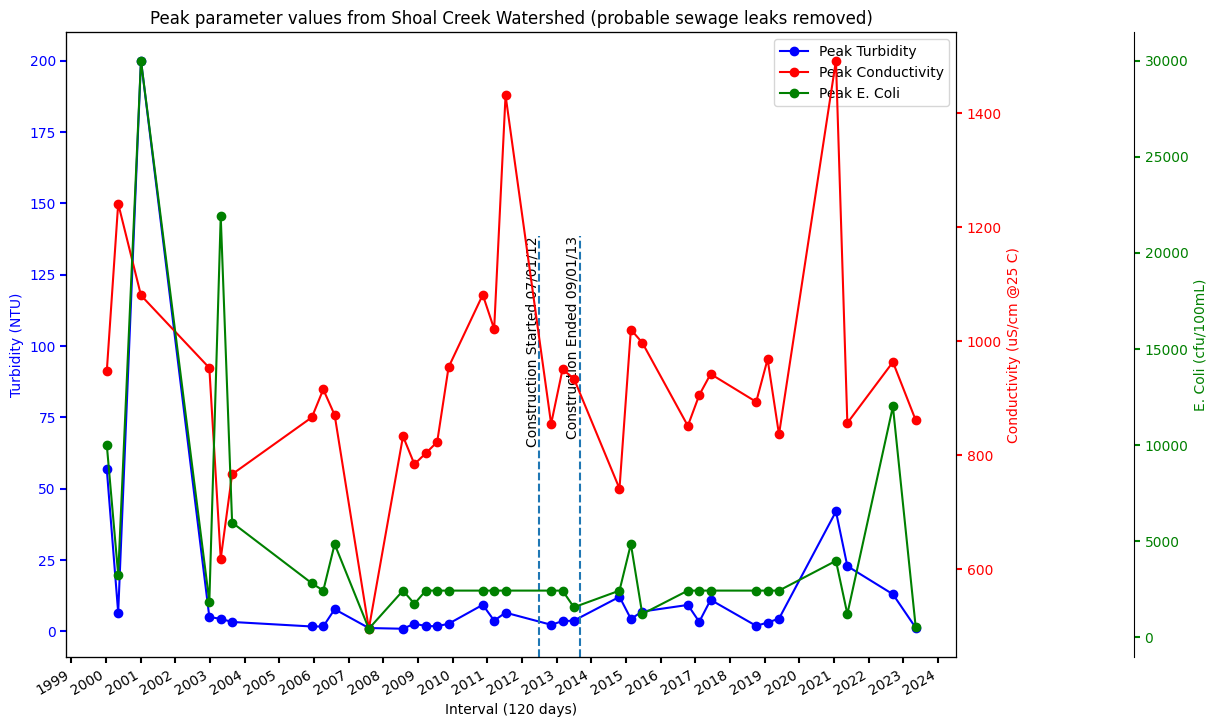

In [61]:
plot_parameter(watershed_parameters, 'max', f'Peak parameter values from Shoal Creek Watershed (probable sewage leaks removed)')